<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/03-analisis-univariante-causal-multivariante/03_C___Introducci%C3%B3n_analisis_causal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 INTRO: Análisis Causal 
El análisis causal trata de encontrar las relaciones causales (no solo asociaciones) entre las variables.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1WNWGnLUyiGqwFf92V3V_szu3QTD_0EQY5GZjhFgen5Q/edit?usp=sharing)
*   [Enlace a este notebook en Colab](https://colab.research.google.com/drive/1B37GMOCjKQ0S8NoRI6lALEW9EZtE0Hit#scrollTo=R53FGLN8jo1L)




## 0101 Qué es un análisis univariante?
El análisis univariante consiste en estudiar la distribución y características de una sola variable.

Veamos con ejemplos:

## 0102 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)): pandas, numpy, seaborn, matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0103 Carga el dataset Fifa19
Para probar a hacer análisis univariantes utilizaremos el dataframe con datos ya limpios del fifa 19 ([aquí](https://drive.google.com/file/d/1P0sQHp1bPiKbL-MSr7FndJRgowvOLdjU/view?usp=sharing) está mi archivo ya limpio). Importa este dataset en un dataframe llamado **df_fifa19**.

Utiliza solo las columnas cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 
        'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 
        'Release Clause_€', 'Preferred Foot', 'Position', 'SprintSpeed'] y en este orden.

In [2]:
cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 
        'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 
        'Release Clause_€', 'Preferred Foot', 'Position', 'SprintSpeed']

# Url
url = "https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Fifa19_Clean.csv"

# Importamos el archivos usando read_csv()
df_fifa19 = pd.read_csv(url, usecols=cols)
df_fifa19.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Position,SprintSpeed,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,RF,86.0,72.121128,110500000.0,565000.0,226500000.0,170.18
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,ST,91.0,83.007336,77000000.0,405000.0,127100000.0,187.96
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,LW,90.0,68.038800,118500000.0,290000.0,228100000.0,175.26


# 02 Azar
El azar puede ser la fuente de una correlación.

Imaginémonos dos monedas de 1€. Una es de Pepe, y la otra de Carmen. Se ponen de acuerdo y tiran sus respectivas monedas 10 veces. Anotan un 1 si sale cara, un 0 si sale cruz.  

## 0201 Probabilidad de correlación
Qué probabilidad hay de que (solo por azar) obtengan una correlación entre ambas monedas mayor a [0.5]?

In [8]:
# Definimos una moneda
moneda = pd.Series([0,1])
moneda

0    0
1    1
dtype: int64

In [28]:
# Ejemplo de tirada
moneda.sample(10, replace=True).reset_index(drop=True)

0    1
1    0
2    1
3    1
4    0
5    1
6    1
7    0
8    0
9    0
dtype: int64

In [42]:
#Experimento
# Primero generamos una variable donde guardaremos los valores de la correlación
correlacion = []

# Empezamos experimento 
for n_experimento in range(10000):
  tirada_pepe = moneda.sample(10, replace=True).reset_index(drop=True)
  tirada_carmen = moneda.sample(10, replace=True).reset_index(drop=True)
  correlacion.append(tirada_pepe.corr(tirada_carmen))

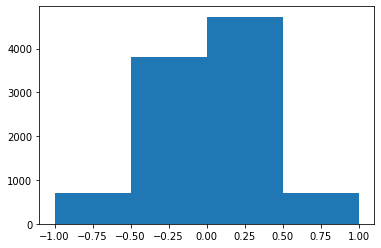

In [35]:
# Visualizamos la distribución de correlación
plt.hist(correlacion, bins=[-1, -0.5, 0, 0.5, 1])
plt.show()

In [41]:
(np.abs(correlacion)>=0.5).sum() / len(correlacion)

0.1425

## 0202 Y si tiran la moneda 20 veces? y 100?
La probabilidad de que el azar sea el causante de una correlación disminuye cuando el tamaño de la muestra es mayor (es decir, cuando tiran la moneda más veces).

In [52]:
# EXPERIMENTO
# Inicializamos un dataframe para guardar los resultados
df_resultados = pd.DataFrame()

# Probamos para distintos números de veces que se tiran la moneda
for n_tiradas in [5, 10, 20, 50, 100]:

  # Primero generamos una variable donde guardaremos los valores de la correlación
  correlacion = []

  # Empezamos experimento 
  for n_experimento in range(10000):
    tirada_pepe = moneda.sample(n_tiradas, replace=True).reset_index(drop=True)
    tirada_carmen = moneda.sample(n_tiradas, replace=True).reset_index(drop=True)
    correlacion.append(tirada_pepe.corr(tirada_carmen))
  
  # Guardamos el resultado en el dataframe
  df_resultados[str(n_tiradas)+'_tiradas'] = correlacion

In [44]:
df_resultados.head()

,5_tiradas,10_tiradas,15_tiradas,20_tiradas,100_tiradas
0,0.166667,-0.200000,-0.071429,-0.204124,0.030303
1,NaN,-0.408248,-0.426401,-0.082061,-0.190912
2,0.166667,0.000000,0.288675,0.140028,0.120386
3,-0.166667,0.408248,0.363636,0.311805,-0.025552
4,-0.612372,0.218218,-0.196429,0.010101,0.166132


In [51]:
filtro_interes = df_resultados.abs()>=0.5
filtro_interes.sum()/len(df_resultados)

5_tiradas      0.3353
10_tiradas     0.1424
15_tiradas     0.0444
20_tiradas     0.0320
100_tiradas    0.0000
dtype: float64

# 03 Relación causal directa
No hay métodos estadísticos que nos permitan saber si la relación entre dos variables es causal. Sólo conocimiento sobre el sistema que genera los datos nos permitirá hacer este tipo de juicios.

Lo que sí podemos calcular es la fortaleza de la asociación entre las variables, como hemos visto en el [notebook de análisis bivariantes](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/03-analisis-univariante-causal-multivariante/03_B___Analisis_multivariante.ipynb).